In [2]:
library(tidyverse)

In [4]:
performance_path <- '../performance/'
file_list <- list.files(performance_path)
path_list <- paste0(performance_path, file_list)

In [5]:
i = 0
for (path in path_list) {
    i = i + 1
    
    the_df <- read_csv(path)
    
    if (i == 1) {
        results_df <- the_df
        
    } else {
        results_df <- rbind(results_df, the_df)
    }
    
}

Parsed with column specification:
cols(
  config_str = col_character(),
  phase = col_character(),
  epoch = col_integer(),
  Metric = col_character(),
  Performance = col_double(),
  action_dim = col_integer(),
  batch_size = col_integer(),
  drop_prob = col_double(),
  gamma = col_double(),
  hidden_dim = col_integer(),
  lr = col_double(),
  num_epochs = col_integer(),
  num_hidden = col_integer(),
  option = col_character(),
  state_dim = col_integer(),
  target_update = col_integer(),
  use_scheduler = col_character()
)
Parsed with column specification:
cols(
  config_str = col_character(),
  phase = col_character(),
  epoch = col_integer(),
  Metric = col_character(),
  Performance = col_double(),
  action_dim = col_integer(),
  batch_size = col_integer(),
  drop_prob = col_double(),
  gamma = col_double(),
  hidden_dim = col_integer(),
  lr = col_double(),
  num_epochs = col_integer(),
  num_hidden = col_integer(),
  option = col_character(),
  state_dim = col_integer(),
  targe

Parsed with column specification:
cols(
  config_str = col_character(),
  phase = col_character(),
  epoch = col_integer(),
  Metric = col_character(),
  Performance = col_double(),
  action_dim = col_integer(),
  batch_size = col_integer(),
  drop_prob = col_double(),
  gamma = col_double(),
  hidden_dim = col_integer(),
  lr = col_double(),
  num_epochs = col_integer(),
  num_hidden = col_integer(),
  option = col_character(),
  state_dim = col_integer(),
  target_update = col_integer(),
  use_scheduler = col_character()
)
Parsed with column specification:
cols(
  config_str = col_character(),
  phase = col_character(),
  epoch = col_integer(),
  Metric = col_character(),
  Performance = col_double(),
  action_dim = col_integer(),
  batch_size = col_integer(),
  drop_prob = col_double(),
  gamma = col_double(),
  hidden_dim = col_integer(),
  lr = col_double(),
  num_epochs = col_integer(),
  num_hidden = col_integer(),
  option = col_character(),
  state_dim = col_integer(),
  targe

In [24]:
x_levels <- sort(unique(results_df$hidden_dim))
print(as.character(x_levels))

[1] "128"  "256"  "512"  "1024"


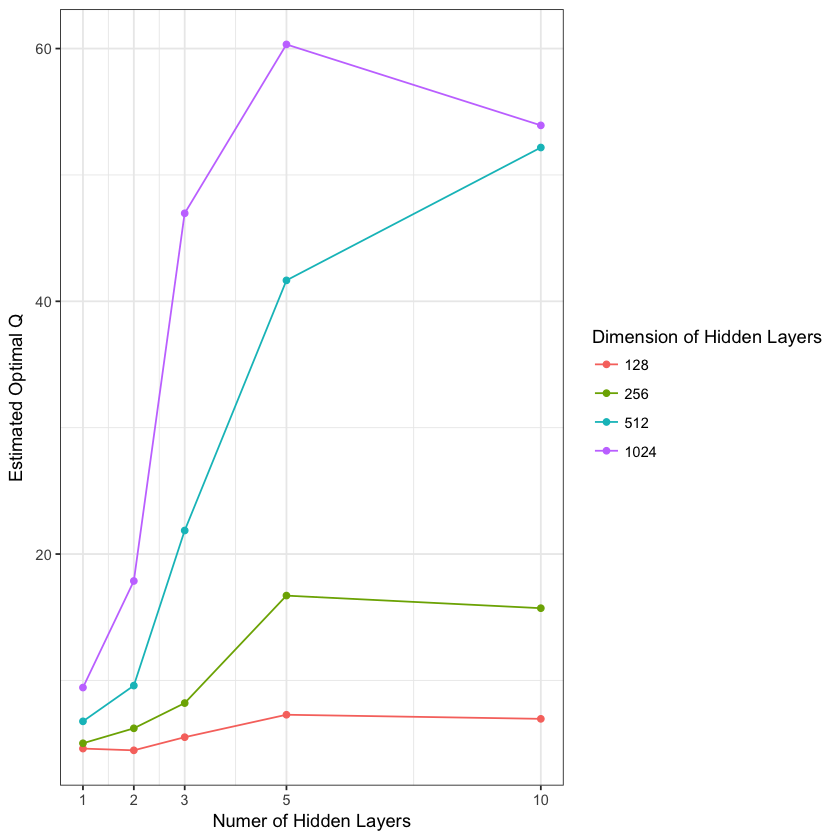

In [37]:
results_df %>% 
                group_by(config_str, phase, Metric, num_hidden, hidden_dim) %>%
                summarise(Performance = max(Performance)) %>%
                filter(phase == 'val',
                       Metric == 'value') %>%
                ggplot(aes(num_hidden, Performance, color = as.factor(hidden_dim))) + 
                    geom_point() + 
                    geom_line() + 
                    xlab('Numer of Hidden Layers') + 
                    ylab('Estimated Optimal Q') + 
                    scale_x_continuous(breaks = c(1, 2,3, 5, 10)) + 
                    scale_color_discrete('Dimension of Hidden Layers') + theme_bw()
                